<a href="https://colab.research.google.com/github/akashakash19/Calories_burnt_prediction/blob/main/Calories_burnt_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dependencies**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

#**Data collection and processing**

In [3]:
#calories burnt dataset
calories_data = pd.read_csv('/content/calories.csv')
calories_data.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [4]:
#exercise dataset
exercise_data = pd.read_csv('/content/exercise.csv')
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


Combaining the two dataframes

In [15]:
both_datas = pd.concat([exercise_data,calories_data['Calories']], axis=1)

In [16]:
both_datas

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


**Checking number of rows and columns**

In [17]:
both_datas.shape

(15000, 9)

We have 15k datas👆

**Then getting some information about dataset**

In [18]:
both_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


**Checking for missing value**

In [20]:
both_datas.isnull().sum()

,0
User_ID,0
Gender,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0


In this data we got zero missing values

**Getting some statistical measurements for data analyzing**

In [22]:
both_datas.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


This is the percentile value👆

#**Data distribution**

In [23]:
sns.set()

/tmp/ipython-input-2163410302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=both_datas, x='Gender', palette='Set2')


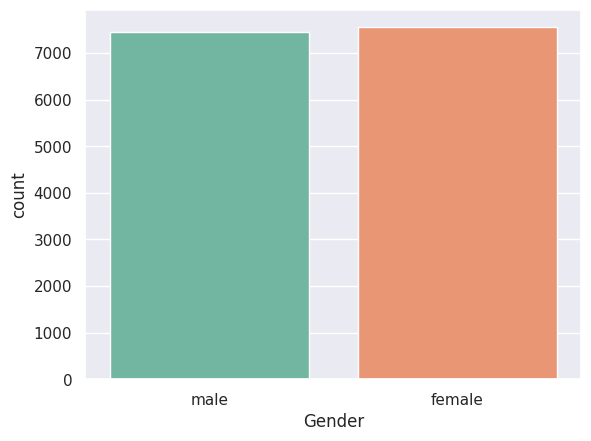

In [26]:
#plotting the gender columns with count plot
sns.countplot(data=both_datas, x='Gender', palette='Set2')
plt.show()

In [27]:
both_datas['Gender'].value_counts()

,count
Gender,
female,7553
male,7447


/tmp/ipython-input-2787311392.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(both_datas['Age'])


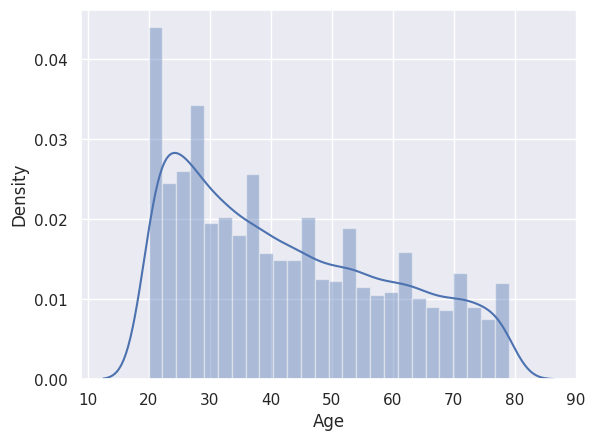

In [28]:
#finding the distributuion of 'Age' columns
sns.distplot(both_datas['Age'])
plt.show()

/tmp/ipython-input-506699954.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(both_datas['Height'])


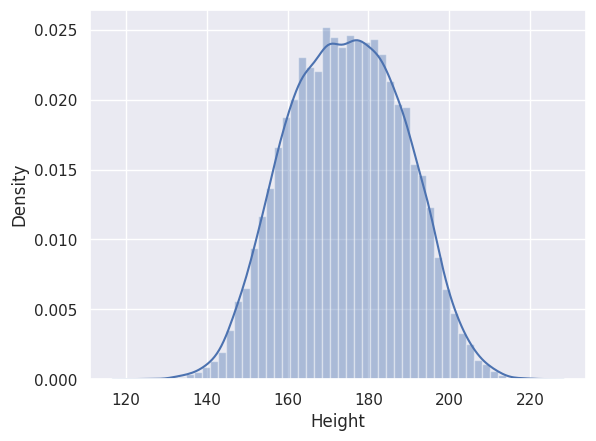

In [29]:
#finding the distributuion of 'Height' columns
sns.distplot(both_datas['Height'])
plt.show()

When got the normal distribution "Bell curve".👆

/tmp/ipython-input-1613401930.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(both_datas['Duration'])


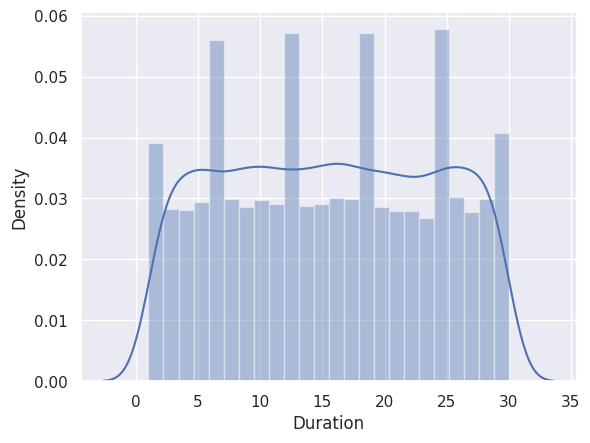

In [30]:
#finding the distribution 'Duration' column
sns.distplot(both_datas['Duration'])
plt.show()

/tmp/ipython-input-4148638630.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(both_datas['Heart_Rate'])


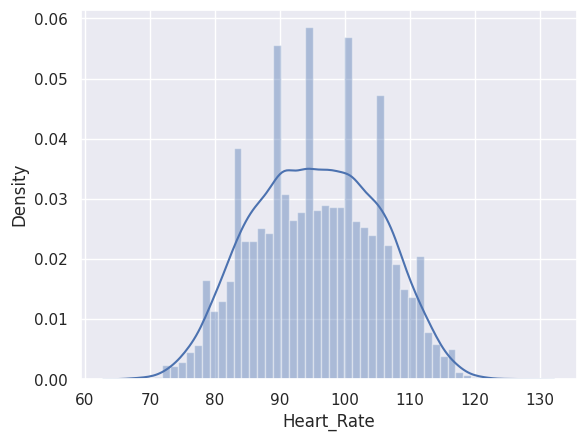

In [31]:
#Finding the distribution 'Heart_Rate' columns
sns.distplot(both_datas['Heart_Rate'])
plt.show()

/tmp/ipython-input-3918640518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(both_datas['Calories'])


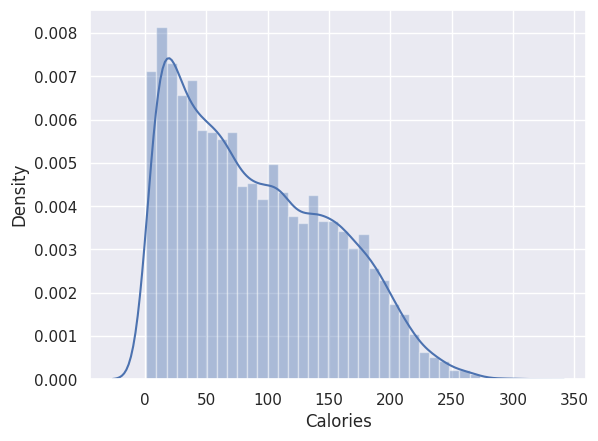

In [32]:
#Finding the distribution of 'Calories' columns
sns.distplot(both_datas['Calories'])
plt.show()

Finding correlation in the dataset

1. Positive correlation
2. Negative correlation

**Duration increase then aslo calories also increases same direction

In [40]:
#Convert text data to numerical data
both_datas.replace({'Gender' : {'male' : 0 ,'female' : 1}}, inplace=True)
both_datas.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


In [41]:
correlation = both_datas.corr()

<Axes: >

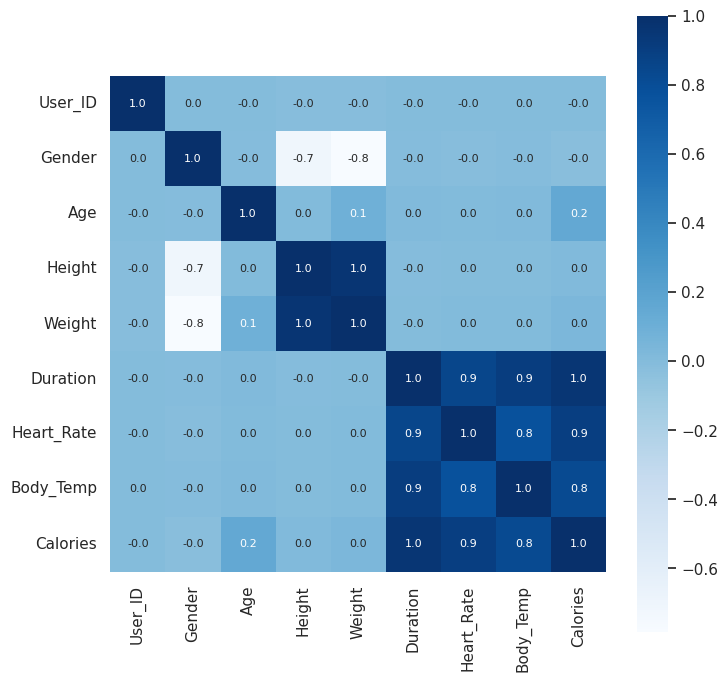

In [43]:
#constructing a heatmap to understand the correlation

plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

it helps you see how strongly features are related to each other.👆

#**Separating features and Label**

In [44]:
X = both_datas.drop(columns=['User_ID','Calories'], axis=1)
Y = both_datas['Calories']

In [45]:
print(X,Y)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           0   68   190.0    94.0      29.0       105.0       40.8
1           1   20   166.0    60.0      14.0        94.0       40.3
2           0   69   179.0    79.0       5.0        88.0       38.7
3           1   34   179.0    71.0      13.0       100.0       40.5
4           1   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       1   20   193.0    86.0      11.0        92.0       40.4
14996       1   27   165.0    65.0       6.0        85.0       39.2
14997       1   43   159.0    58.0      16.0        90.0       40.1
14998       0   78   193.0    97.0       2.0        84.0       38.3
14999       0   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns] 0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999   

**Splitting the data into training and testing data**

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=45)

In [47]:
print(X.shape,X_train.shape,X_test.shape)

(15000, 7) (12000, 7) (3000, 7)


#**Model Training**

**XGBoost Regressor**

In [48]:
model = XGBRegressor()

In [49]:
#traing the model with X_train
model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

What Happens Internally?

When you call .fit():               
--The model learns patterns from data                   
--Adjusts internal parameters (weights, coefficients)               
--Minimizes error (loss function)                   
--Prepares itself to make predictions                          

**Evalution**

Prediction on test data

In [50]:
test_data_prediction = model.predict(X_test)
print(test_data_prediction)

[ 45.662758 108.27919  119.71597  ...  34.28583   91.09018   71.52298 ]


**Mean absolute error**

MAE measures the average magnitude of errors between actual and predicted values, without considering direction.

In [51]:
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print('Mean Absolute Error :', mae)

Mean Absolute Error : 1.4940105013251304


**“My model predicts values close to the actual ones, with an average error of about 1.5 units.”**

Build predictive system

In [56]:
import numpy as np

# Step 1: give input values (same order as X.columns)
input_data = [0,68,190.0,94.0,29.0,105.0,40.0]   # example values

# Step 2: convert to numpy array
input_data_numpy = np.asarray(input_data)

# Step 3: reshape for single prediction
input_data_numpy_reshape = input_data_numpy.reshape(1, -1)

# Step 4: predict
prediction = model.predict(input_data_numpy_reshape)

print("Predicted value:", prediction[0])


Predicted value: 228.85149


In [54]:
both_datas.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0
